# OUTLINE

- ## Libraries import

- ## Preprocessing
1) remove missing data
2) extract X and y
3) replace bacteria's names with numbers
4) Split training (64%), validation (16%) and test set (20%)  (with the cross validation and the learning curves, there is already the creation of the validation set) 
5) data normalization using Z-norm 

- ## Models creation
1) Model selection : KNN, Random forest and MLP 
2) First score estimation for each model 

- ### KNN
0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Hyper parameter tuning from scratch 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Validation curves : analysis underfitting/overfitting 

- ### Random Forest
0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Validation curves : analysis underfitting/overfitting 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Display of decision trees (for interpretability) 

TO DO : Discussion concerning the method that allows the selection of the feature entropy/gini

- ### MLP
0) Explanation of the principle behind this model 
1) Discussion about the architecture 
2) Bias and Variance : impact of each parameter 
3) Validation curves : analysis underfitting/overfitting 
4) Automatic hyper parameter tuning with GridSearchCV 

- ## Result comparison
1) Confusion Matrix 
2) Precision and Accuracy 
3) ROC 
4) Complexity of each model and time computation 


- ## Interpretability discussion
1) Complexity and score tradeoff 
2) Interpretability of each model 
3) Conclusion 



In [16]:
# Machine Learning Importation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

# Models importation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# Importation of the dataset
data = pd.read_csv ('bacteria.csv')

In [4]:
# delete all incomplete data
data.dropna(axis=0, inplace=True)

# replacement of all bacteria names with numbers
data['target'].replace(['Streptococcus_pyogenes',
                        'Salmonella_enterica',
                        'Enterococcus_hirae',
                        'Streptococcus_pneumoniae',
                        'Staphylococcus_aureus',
                        'Klebsiella_pneumoniae',
                        'Bacteroides_fragilis',
                        'Escherichia_coli',
                        'Campylobacter_jejuni',
                        'Escherichia_fergusonii'],
                      [0,1,2,3,4,5,6,7,8,9], inplace=True)

# print first data
data.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,1
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,1
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


In [5]:
# remove the first and the last column
X = data.drop(['target', 'row_id'], axis=1)

# extraction of the last column
y = data['target']

In [6]:
# Split dataset into two parts: training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split training set into two parts: training set and validation set
X_train_splitted, X_val, y_train_splitted, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [7]:
# Scale X_train, X_val, X_test using Z-score normalization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_splitted_scaled = sc.fit_transform(X_train_splitted)
X_val_scaled = sc.fit_transform(X_val)
X_test_scaled = sc.fit_transform(X_test)

In [8]:
# Adding the models to be tested
models_list = []
models_list.append(KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2))
models_list.append(DecisionTreeClassifier())
models_list.append(RandomForestClassifier())
models_list.append(MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=(100,10)))

In [9]:
import time

score_list_train = []
score_list_val = []
execution_time = []
models_tested = ['KNN', 
                 'Decision Tree', 
                 'Random Forest',
                 'MLP'
                 ]

for model in models_list:

    # start computing time
    st = time.time()

    # training
    model.fit(X_train_splitted_scaled, y_train_splitted) 
    et = time.time()

    # compute the execution time
    elapsed_time = et - st

    score_list_train.append(model.score(X_train_splitted_scaled, y_train_splitted))
    score_list_val.append(model.score(X_val_scaled, y_val))
    execution_time.append(elapsed_time)
    

In [10]:
result = pd.DataFrame({'Model':models_tested, 'Train score':score_list_train, 
                       'Test score':score_list_val, 'Execution Time':execution_time})

# print the result
result

,Model,Train score,Test score,Execution Time
0,KNN,1.000000,0.987156,0.335388
1,Decision Tree,1.000000,0.951313,20.567937
2,Random Forest,1.000000,0.990469,74.719966
3,MLP,0.997461,0.984500,129.116718


# KNN

0) Explanation of the principle behind this model 

The KNN describes the K nearest neighbors algorithm and is a supervised machine learning classification algorithm.
To classify new data, its distance to the features of the classified data is computed and it is put in the predominant class in the K nearest neighbors.
Depending on the type of weighting, the predominant class can be the class that accumulates the most neighbors or the class with the most and closest neighbors.

<img src="images/knn.png" alt="KNN algorithm explanation" width="800"/>\
*https://www.ibm.com/it-it/topics/knn*

We use 2 ways to evaluate the distance :
- Manhattan distance or *L1* : $\sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
- Euclidian distance or *L2* : $\sum_{i=1}^{n} |x_i - y_i|$

In this type of model, the most impacting parameter is K: the number of neighbors to consider.

1) Bias and Variance : impact of each parameter 

The K number of neighbors greatly impacts both Bias and Variance. When K has a small value, the Variance is high and when K has a large value the Bias is high.
Thus, both Bias and Variance cannot be low and the the value of K must be selected to find a good compromise between the Bias and the Variance.

2) Hyper parameter tuning from scratch
3) Automatic hyper parameter tuning with GridSearchCV 
4) Learning curves : analysis underfitting/overfitting 

In [11]:
n_neighbors = [1,3,5,7] # number k of neighbors 
weights = ['uniform', 'distance'] # weight function used in prediction
p = [1,2] 

score_list_train_all = []
score_list_val_all = []
execution_time_all = []
n_neighbors_all = []
weights_all = []
p_all = []

# Hyperparameter tuning for KNN from scratch
for n in n_neighbors:
    for w in weights:
        for pp in p:
            st = time.time()
            model = KNeighborsClassifier(n_neighbors=n, weights=w, p=pp)
            model.fit(X_train_splitted_scaled, y_train)
            et = time.time()
            elapsed_time = et - st
            score_list_train_all.append(model.score(X_train_splitted_scaled, y_train))
            score_list_val_all.append(model.score(X_val_scaled, y_val))
            execution_time_all.append(elapsed_time)
            n_neighbors_all.append(n)
            weights_all.append(w)
            p_all.append(pp)
            result_all = pd.DataFrame({'Model':'KKN', 'Train score':score_list_train_all,
                                   'Test score':score_list_val_all, 'Execution Time':execution_time_all, 'n_neighbors':n_neighbors_all, 'weights':weights_all, 'p': p_all})
print(result_all)

   Model  Train score  Test score  Execution Time  n_neighbors   weights  p
0    KKN     1.000000    1.000000        0.279999            1   uniform  1
1    KKN     1.000000    1.000000        0.258999            1   uniform  2
2    KKN     1.000000    1.000000        0.247001            1  distance  1
3    KKN     1.000000    1.000000        0.318001            1  distance  2
4    KKN     0.993225    0.993812        0.248001            3   uniform  1
5    KKN     0.992200    0.992656        0.260000            3   uniform  2
6    KKN     1.000000    1.000000        0.249000            3  distance  1
7    KKN     1.000000    0.999812        0.258001            3  distance  2
8    KKN     0.981925    0.983000        0.248003            5   uniform  1
9    KKN     0.979094    0.980219        0.253000            5   uniform  2
10   KKN     1.000000    1.000000        0.251000            5  distance  1
11   KKN     1.000000    0.999781        0.250001            5  distance  2
12   KKN    

In [13]:
# Automatic hyperparameter tuning for KNN
from sklearn.model_selection import GridSearchCV
param_grid_KNN = {'n_neighbors' : [1,3,5,7],
              'weights' : ['uniform', 'distance'],
              'p' : [1, 2] # p=1 : manhattan_distance, p=2 : euclidean_distance
              }

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5) # 5-fold cross validation
grid_KNN.fit(X_train_scaled, y_train)

print("Best score:", grid_KNN.best_score_)
print("Param:", grid_KNN.best_params_)



Best score: 0.988025
Param: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [14]:
# Train the best model for KNN
best_KNN_model = KNeighborsClassifier(n_neighbors=grid_KNN.best_params_['n_neighbors'], weights=grid_KNN.best_params_['weights'], p=grid_KNN.best_params_['p'])
best_KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

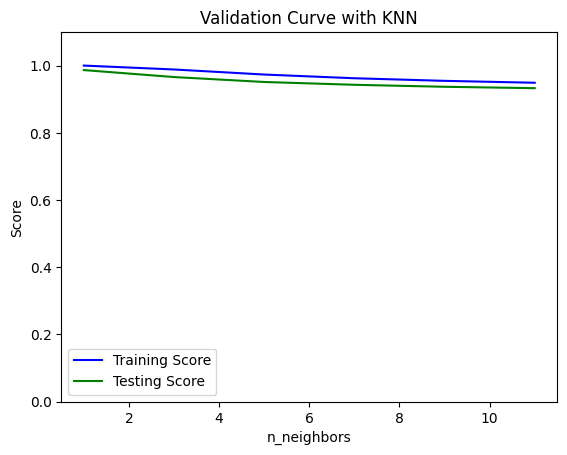

In [17]:
# Validation curve for KNN on n_neighbors: number K of neighbors 

param_K_range = [1,3,5,7,9,11]
train_scores_KNN, test_scores_KNN = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", param_range=param_K_range, cv=5) # 5-fold cross validation

train_scores_mean_KNN = np.mean(train_scores_KNN, axis=1) # mean of the training scores
train_scores_std_KNN = np.std(train_scores_KNN, axis=1) # standard deviation of the training scores
test_scores_mean_KNN = np.mean(test_scores_KNN, axis=1) # mean of the test scores
test_scores_std_KNN = np.std(test_scores_KNN, axis=1) # standard deviation of the test scores

plt.plot(param_K_range, train_scores_mean_KNN,
     label = "Training Score", color = 'b')
plt.plot(param_K_range, test_scores_mean_KNN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


# Random Forest

0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Validation curves : analysis underfitting/overfitting 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Display of decision trees (for interpretability) 

Explanation

Bias and Variance

In [ ]:
# Validation curve for Random Forest on n_estimators: number of trees in the forest
param_n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 600]
train_scores_RF, test_scores_RF = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="n_estimators", param_range=param_n_estimators_range, cv=5) # 5-fold cross validation

train_scores_mean_RF = np.mean(train_scores_RF, axis=1) # mean of the training scores
train_scores_std_RF = np.std(train_scores_RF, axis=1) # standard deviation of the training scores
test_scores_mean_RF = np.mean(test_scores_RF, axis=1) # mean of the test scores
test_scores_std_RF = np.std(test_scores_RF, axis=1) # standard deviation of the test scores

plt.plot(param_n_estimators_range, train_scores_mean_RF,
     label = "Training Score", color = 'b')
plt.plot(param_n_estimators_range, test_scores_mean_RF,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the number of trees")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

In [ ]:
# Validation curve for Random Forest on max_depth: maximum depth of the tree
param_max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 90, 130, 170, 210, 250]
train_scores_RF2, test_scores_RF2 = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="max_depth", param_range=param_max_depth_range, cv=5) # 5-fold cross validation

train_scores_mean_RF2 = np.mean(train_scores_RF2, axis=1) # mean of the training scores
train_scores_std_RF2 = np.std(train_scores_RF2, axis=1) # standard deviation of the training scores
test_scores_mean_RF2 = np.mean(test_scores_RF2, axis=1) # mean of the test scores
test_scores_std_RF2 = np.std(test_scores_RF2, axis=1) # standard deviation of the test scores

plt.plot(param_max_depth_range, train_scores_mean_RF2,
     label = "Training Score", color = 'b')
plt.plot(param_max_depth_range, test_scores_mean_RF2,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum depth of each tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


In [ ]:
# Automatic hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid_random_forest = {'n_estimators' : [100, 200, 300],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 50, 100, 200, 250, 280]
              }

grid_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5) # 5-fold cross validation
grid_random_forest.fit(X_train_scaled, y_train)

print("Best score:", grid_random_forest.best_score_)
print("Param:", grid_random_forest.best_params_)

In [ ]:
# Best random forest model
best_random_forest = grid_random_forest.best_params_
best_random_forest_model = RandomForestClassifier(n_estimators=best_random_forest['n_estimators'], criterion=best_random_forest['criterion'], max_depth=best_random_forest['max_depth'])
best_random_forest_model.fit(X_train_scaled, y_train)

# print the three first trees of the random forest
from sklearn import tree
tree.plot_tree(best_random_forest_model.estimators_[0], filled=True)

# Neural network

0) Explanation of the principle behind this model 
1) Discussion about the architecture 
2) Bias and Variance : impact of each parameter 
3) Validation curves : analysis underfitting/overfitting 
4) Automatic hyper parameter tuning with GridSearchCV 

In [ ]:
param_grid_neural_network = {
    'hidden_layer_sizes': [(10, 10, 10), (50, 30, 10), (60, 40, 20), (100, 60, 20)],
    'activation': ['tahn', 'relu'],
    'solver': ['sgd'],
    'max_iter': [200, 1000, 2000],
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 15],
    'shuffle': [True],
    'alpha': [1e-4, 2e-4, 5e-4],
    'learning_rate_init': [1e-3, 2e-3, 5e-3]
}

grid_neural_network = GridSearchCV(MLPClassifier(), param_grid_neural_network, cv=5)
grid_neural_network.fit(X_train_scaled, y_train)

print("Best score:", grid_neural_network.best_score_)
print("Param:", grid_neural_network.best_params_)

In [ ]:
# Best neural network model
best_neural_network_params = grid_neural_network.best_params_
best_neural_network_model = MLPClassifier(
    hidden_layer_sizes=best_neural_network_params['hidden_layer_sizes'],
    activation=best_neural_network_params['activation'],
    solver=best_neural_network_params['solver'],
    max_iter=best_neural_network_params['max_iter'],
    early_stopping=best_neural_network_params['early_stopping'],
    n_iter_no_change=best_neural_network_params['n_iter_no_change'],
    shuffle=best_neural_network_params['shuffle'],
    alpha=best_neural_network_params['alpha'],
    learning_rate_init=best_neural_network_params['learning_rate_init']
)
best_neural_network_model.fit(X_train_scaled, y_train)

In [ ]:
# Validation curve for neural network on number of hidden layers 

param_n_layers = [(10), (10, 10), (10, 10, 10), (10, 10, 10, 10, 10)]
train_scores_KNN, test_scores_KNN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layers", param_range=param_n_layers, cv=5) # 5-fold cross validation

train_scores_mean_KNN = np.mean(train_scores_KNN, axis=1) # mean of the training scores
train_scores_std_KNN = np.std(train_scores_KNN, axis=1) # standard deviation of the training scores
test_scores_mean_KNN = np.mean(test_scores_KNN, axis=1) # mean of the test scores
test_scores_std_KNN = np.std(test_scores_KNN, axis=1) # standard deviation of the test scores

plt.plot(param_K_range, train_scores_mean_KNN,
     label = "Training Score", color = 'b')
plt.plot(param_K_range, test_scores_mean_KNN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

In [ ]:
# Validation curve for neural network on size of hidden layers 

param_layers_sizes = [(10), (30), (50), (70), (90)]
train_scores_KNN, test_scores_KNN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layers", param_range=param_layers_sizes, cv=5) # 5-fold cross validation

train_scores_mean_KNN = np.mean(train_scores_KNN, axis=1) # mean of the training scores
train_scores_std_KNN = np.std(train_scores_KNN, axis=1) # standard deviation of the training scores
test_scores_mean_KNN = np.mean(test_scores_KNN, axis=1) # mean of the test scores
test_scores_std_KNN = np.std(test_scores_KNN, axis=1) # standard deviation of the test scores

plt.plot(param_K_range, train_scores_mean_KNN,
     label = "Training Score", color = 'b')
plt.plot(param_K_range, test_scores_mean_KNN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

# Result comparison
1) Confusion Matrix 
2) Precision and Accuracy 
3) ROC 
4) Complexity of each model and time computation 

In [ ]:
# print the three confusion matrices on the same plot
from sklearn.metrics import confusion_matrix

y_pred_KNN = best_KNN_model.predict(X_test_scaled)
y_pred_RF = best_random_forest_model.predict(X_test_scaled)
y_pred_NN = best_neural_network_model.predict(X_test_scaled)

confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
confusion_matrix_NN = confusion_matrix(y_test, y_pred_NN)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].matshow(confusion_matrix_KNN, cmap=plt.cm.Blues, alpha=0.3)
ax[0].set_title("Confusion matrix for KNN")
ax[1].matshow(confusion_matrix_RF, cmap=plt.cm.Blues, alpha=0.3)
ax[1].set_title("Confusion matrix for Random Forest")
ax[2].matshow(confusion_matrix_NN, cmap=plt.cm.Blues, alpha=0.3)
ax[2].set_title("Confusion matrix for Neural Network")

In [ ]:
# Precision and accuracy for KNN
from sklearn.metrics import precision_score, accuracy_score

precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

print("Precision for KNN:", precision_KNN)
print("Accuracy for KNN:", accuracy_KNN)

# Precision and accuracy for Random Forest

precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print("Precision for Random Forest:", precision_RF)
print("Accuracy for Random Forest:", accuracy_RF)

# Precision and accuracy for Neural Network

precision_NN = precision_score(y_test, y_pred_NN, average='weighted')
accuracy_NN = accuracy_score(y_test, y_pred_NN)

print("Precision for Neural Network:", precision_NN)
print("Accuracy for Neural Network:", accuracy_NN)

In [ ]:
# ROC curve for KNN
from sklearn.metrics import roc_curve, auc

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend(loc="best")
plt.show()

# ROC curve for Random Forest

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="best")
plt.show()

# ROC curve for Neural Network

fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)

plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_NN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Neural Network')
plt.legend(loc="best")
plt.show()

# Interpretability Discussion
1) Complexity and score tradeoff 
2) Interpretability of each model 
3) Conclusion 